# 합성곱신경망 이진분류 (cats and dogs - 컬러 이미지)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

## 1. 데이터 준비

In [ ]:
!gdown https://drive.google.com/uc?id=1dC-Kso5FonYWtbxtJnJ8_dxO_Jlo8weR

Downloading...
From (original): https://drive.google.com/uc?id=1dC-Kso5FonYWtbxtJnJ8_dxO_Jlo8weR
From (redirected): https://drive.google.com/uc?id=1dC-Kso5FonYWtbxtJnJ8_dxO_Jlo8weR&confirm=t&uuid=e240add0-42f7-4666-880d-4cbab1fb7274
To: /content/cats_and_dogs.zip
100% 68.6M/68.6M [00:00<00:00, 115MB/s]


In [ ]:
!unzip -q '/content/cats_and_dogs.zip'

In [ ]:
data_root = './cats_and_dogs'
train_dir = data_root + '/train'
test_dir = data_root + '/test'

### 이미지 로딩

In [ ]:
class_name = ['cat', 'dog']

In [ ]:
import os

train_cats_fname = os.listdir(train_dir + '/cats')
train_dogs_fname = os.listdir(train_dir + '/dogs')

In [ ]:
import PIL

x_train = []
y_train = []

for fname in train_cats_fname:
  img = PIL.Image.open(train_dir + '/cats/' + fname)
  img = img.resize((224, 224))
  arr = np.array(img)
  x_train.append(arr)
  y_train.append(0) # 고양이: 0

In [ ]:
len(x_train), len(y_train)

(1300, 1300)

In [ ]:
for fname in train_dogs_fname:
  img = PIL.Image.open(train_dir + '/dogs/' + fname)
  img = img.resize((224, 224))
  arr = np.array(img)
  x_train.append(arr)
  y_train.append(1) # 개: 1

In [ ]:
len(x_train), len(y_train)

(2600, 2600)

In [ ]:
type(x_train)

list

In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [ ]:
# 테스트 데이터 로딩

## 2. 데이터 분리

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((2080, 224, 224, 3), (520, 224, 224, 3), (2080,), (520,))

In [ ]:
samples = np.random.randint(2000, size=25)
samples

array([1677,  496,  721,  849,  223, 1357, 1077,  108, 1098, 1877, 1960,
       1455, 1518,  864, 1483,  763, 1114, 1864, 1201, 1971,  400, 1041,
        164,  387,  725])

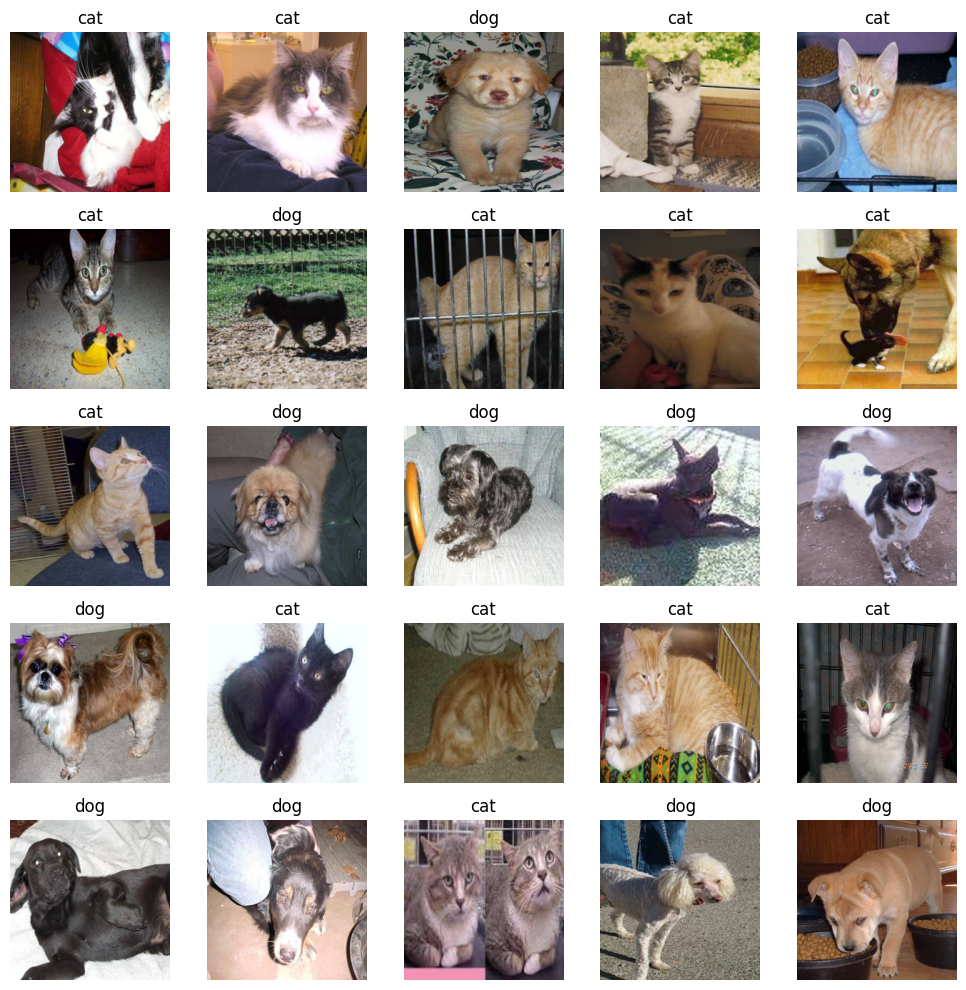

In [ ]:
fig = plt.figure(figsize=(10, 10))

for i, idx in enumerate(samples):
  plt.subplot(5, 5, i+1)
  plt.imshow(x_train[idx])
  plt.axis('off')
  plt.title(class_name[y_train[idx]])
plt.tight_layout()
plt.show()

### 스케일링

In [ ]:
# MinMax Sclaing
x_train_s = x_train/ 255.0
x_val_s = x_val/ 255.0

In [ ]:
x_train_s.shape

(2080, 224, 224, 3)

In [ ]:
# 이진분류는 원핫인코딩 필요없음
# RGB 이미지는 3차원이라 그대로 넣어도 됨

## 3. 모델 생성

In [ ]:
from keras import layers
import tensorflow as tf

model = keras.Sequential([
    keras.layers.Input(shape=(224,224,3)),
    keras.layers.Conv2D(filters = 64, kernel_size = 3, activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)), # 맥스 풀링 레이어
    keras.layers.Conv2D(filters = 64, kernel_size = 3, activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(), # 2차원 -> 1차원
    keras.layers.Dense(units = 128, activation='relu'), # Fully connected layer
    keras.layers.Dense(units = 1, activation='sigmoid') # 이진분류 출력층 -> sigmoid & units = 1
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      23,888,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,926,849 (91.27 MB)

 Trainable params: 23,926,849 (91.27 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer= 'adam',
    loss='binary_crossentropy',
    metrics=['accuracy'] # 분류 -> accuracy
    )

In [ ]:
EPOCHS = 10
BATCHSIZE =32

history = model.fit(x_train_s, y_train, epochs=EPOCHS, batch_size=BATCHSIZE, validation_data=(x_val_s, y_val))

Epoch 1/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 15s 119ms/step - accuracy: 0.5321 - loss: 1.4676 - val_accuracy: 0.5385 - val_loss: 0.6664
Epoch 2/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 12s 72ms/step - accuracy: 0.5619 - loss: 0.6694 - val_accuracy: 0.5135 - val_loss: 1.0055
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.6248 - loss: 0.6755 - val_accuracy: 0.5885 - val_loss: 0.6706
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - accuracy: 0.7172 - loss: 0.5682 - val_accuracy: 0.6500 - val_loss: 0.7026
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - accuracy: 0.8323 - loss: 0.3959 - val_accuracy: 0.5712 - val_loss: 0.9154
Epoch 6/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - accuracy: 0.9106 - loss: 0.2261 - val_accuracy: 0.5731 - val_loss: 1.1446
Epoch 7/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.9639 - loss: 0.1171 - val_accuracy: 0.6096 - val_loss: 1.5478
Epoch 8/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - accuracy: 0.9880 - loss: 0.0500 - val_accuracy: 0.6000 

In [ ]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.xlabel('Epoch')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'], label='train_loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='val_loss')
    plt.title('Loss Curve')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.xlabel('Epoch')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='train_accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'], label='val_accuracy')
    plt.title('Accuracy Curve')
    plt.legend()

    plt.show()

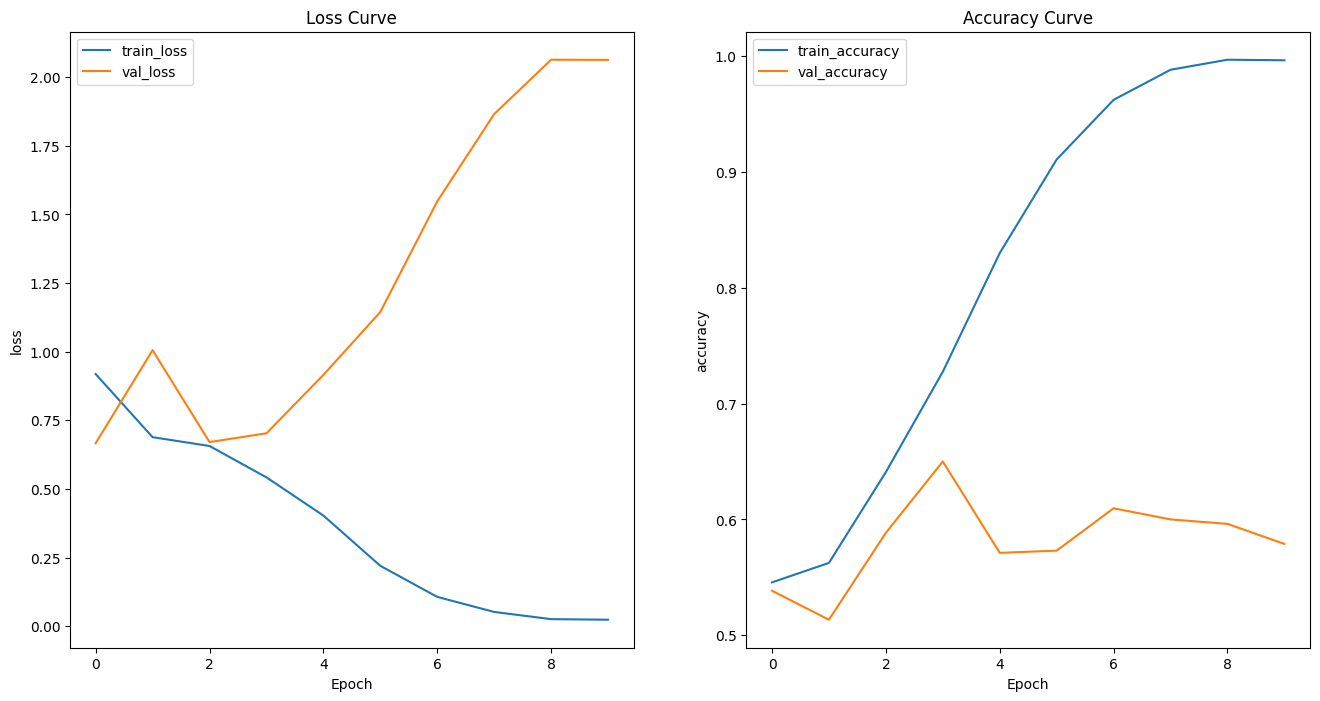

In [ ]:
plot_history(history)

## 4. 테스트